In [1]:
# 일단 2015데이터로 학습, 예측

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [23]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_2 = pd.read_csv(path+'imp_시군구별지역안전지표_2014.csv', encoding='cp949')

In [37]:
sigungu_y = sigungu.iloc[:,-7:] #등급(binary) - 15년, 14년도 
sigungu_x_15 = sigungu.iloc[:,4:-7] #독립변수X - 15년 
sigungu_name_15 = sigungu.iloc[:,:4] #이름 - 15년
sigungu_x_14 = sigungu_2.iloc[:,3:]
sigungu_name_14 = sigungu_2.iloc[:,:3]

### 표준화

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
sigungu_x_14scaled = scaler.fit_transform(sigungu_x_14)
sigungu_x_15scaled = scaler.fit_transform(sigungu_x_15)

In [39]:
sigungu_x_14scaled = pd.DataFrame(data = sigungu_x_14scaled)
sigungu_x_15scaled = pd.DataFrame(data = sigungu_x_15scaled)
sigungu_x_14scaled.columns = sigungu_x_14.columns
sigungu_x_15scaled.columns = sigungu_x_15.columns
sigungu_x_14scaled.shape,sigungu_x_15scaled.shape

((226, 144), (226, 144))

### 스코어함수들
    * 상위 3개함수를 한번에 보는 score(model,x,y,pred)함수
    - kfold_crossvalscore(): kfold의 평균 스코어들을 한번에 출력되도록 함
    - metric_score(): 분류메트릭을 이용한 스코어들을 한번에 출력되도록 함
    - confusion_matrix(y, pred)
    
    - paper(): 얼만큼 맞췄는지 확인해보려고
    - classification report
    - model.score()
    
    *한번에 roc커브 그리기

In [40]:
#교차검증 실험 crossvalscore이용
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(3, shuffle=True, random_state=0)
def KFold_meanscore(ary):
    tot = 0
    for i in ary:
        tot += i
    return tot/len(ary),ary
def kfold_crossvalscore(model, X, y, cv=cv):
    ary1 = cross_val_score(model, X, y, cv=cv, scoring='f1', verbose=0)
    ary2 = cross_val_score(model, X, y, cv=cv, scoring='accuracy', verbose=0)
    ary3 = cross_val_score(model, X, y, cv=cv, scoring='precision', verbose=0)
    ary4 = cross_val_score(model, X, y, cv=cv, scoring='recall', verbose=0)
    print(f'f1-score:{KFold_meanscore(ary1)}')
    print(f'accuracy:{KFold_meanscore(ary2)}')
    print(f'precision:{KFold_meanscore(ary3)}')
    print(f'recall:{KFold_meanscore(ary4)}')

In [41]:
#분류메트릭이용
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def metric_score(y, pred):
    print(f'f1 :\t\t{f1_score(y,pred)}')
    print(f'accuracy :\t{accuracy_score(y,pred)}')
    print(f'precision :\t{precision_score(y, pred)}')
    print(f'recall :\t{recall_score(y, pred)}')

In [42]:
#confusion matrix
def confusion_matrix(y,pred):
    confusion_matrix = pd.crosstab(y, pred, rownames=['True'], colnames=['Predicted'], margins=True)
    return confusion_matrix

In [43]:
#위 세개함수를 한번에 출력
def score(model, x, y, pred):
    print('[metric score]\n\n',metric_score(y,pred))
    print('[kfold crossvalscore]\n\n',kfold_crossvalscore(model,x,y))
    return confusion_matrix(y,pred)

In [44]:
#정답지
def paper(y, pred):
    a = pd.DataFrame(data=pred,columns=['예측'])
    b = pd.DataFrame(data=y)
    return pd.concat([a,b],axis=1)

In [45]:
#추가사용: classification report
from sklearn.metrics import classification_report
# print(classification_report(sido_y.감염병,pred_mlp, target_names=['123','45']))

In [46]:
# 추가사용: model.score(x,y)
# mlp.score(sigungu_x_15scaled, sigungu_y.감염병)

# model: MLP

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(sigungu_x_15scaled, sigungu_y.감염병) #15스케일로학습
pred_mlp = mlp.predict(sigungu_x_14scaled) #15스케일로예측

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [51]:
score(mlp, sigungu_x_14scaled, sigungu_y.감염병, pred_mlp)

f1 :		0.8933333333333334
accuracy :	0.9292035398230089
precision :	0.9571428571428572
recall :	0.8375
[metric score]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklea

f1-score:(0.6903031436946208, array([0.71698113, 0.70175439, 0.65217391]))
accuracy:(0.796374269005848, array([0.81578947, 0.78666667, 0.78666667]))
precision:(0.6999395039322444, array([0.62068966, 0.68965517, 0.78947368]))
recall:(0.683408295852074, array([0.82608696, 0.72413793, 0.5       ]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,0,1,All
True,,,
0,143,3,146
1,13,67,80
All,156,70,226


# RFC

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_rfc = rfc.predict(sigungu_x_14scaled)

In [53]:
score(rfc, sigungu_x_14scaled, sigungu_y.감염병, pred_rfc)

f1 :		0.8368794326241135
accuracy :	0.8982300884955752
precision :	0.9672131147540983
recall :	0.7375
[metric score]

 None
f1-score:(0.5870237423032454, array([0.52173913, 0.69387755, 0.54545455]))
accuracy:(0.7209356725146199, array([0.78947368, 0.68      , 0.69333333]))
precision:(0.7645682834537323, array([0.73684211, 0.82352941, 0.73333333]))
recall:(0.5237559791532805, array([0.69565217, 0.48275862, 0.39285714]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,144,2,146
1,21,59,80
All,165,61,226


# XGB

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.01)
xgb.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_xgb = xgb.predict(sigungu_x_14scaled)

In [55]:
score(xgb, sigungu_x_14scaled, sigungu_y.감염병, pred_xgb)

f1 :		0.703125
accuracy :	0.831858407079646
precision :	0.9375
recall :	0.5625
[metric score]

 None
f1-score:(0.713327721661055, array([0.74074074, 0.69090909, 0.70833333]))
accuracy:(0.8008187134502923, array([0.81578947, 0.77333333, 0.81333333]))
precision:(0.7419768403639372, array([0.64516129, 0.73076923, 0.85      ]))
recall:(0.7106268294424217, array([0.86956522, 0.65517241, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,143,3,146
1,35,45,80
All,178,48,226


# LGBM

In [56]:
infection = sigungu_y.감염병

In [58]:
from lightgbm import LGBMClassifier
import copy#lgbm은 아스키 코드값만 입력받기 때문에 한글을 다 숫자로 바뀌주기
lgbm_sigungu = b = copy.deepcopy(sigungu_x_15scaled) 
lgbm_sigungu.columns = list(range(144))
lgbm= LGBMClassifier(n_estimators=200,num_boost_round =500,learning_rate =0.01)
lgbm.fit(lgbm_sigungu, infection)
pred_lgbm = lgbm.predict(sigungu_x_14scaled)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [59]:
score(lgbm, sigungu_x_14scaled, infection , pred_lgbm)

f1 :		0.6666666666666667
accuracy :	0.8141592920353983
precision :	0.9130434782608695
recall :	0.525
[metric score]

 None


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


LightGBMError: Do not support non-ascii characters in feature name.

# SVC

In [60]:
from sklearn.svm import SVC
svc = SVC(gamma=0.0001, C=3000, probability=True)
svc.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_svc = svc.predict(sigungu_x_14scaled)

In [61]:
score(svc, sigungu_x_14scaled, sigungu_y.감염병, pred_svc)

f1 :		0.8627450980392157
accuracy :	0.9070796460176991
precision :	0.9041095890410958
recall :	0.825
[metric score]

 None
f1-score:(0.7150528804280203, array([0.72      , 0.70175439, 0.72340426]))
accuracy:(0.8052631578947368, array([0.81578947, 0.77333333, 0.82666667]))
precision:(0.7585630743525481, array([0.66666667, 0.71428571, 0.89473684]))
recall:(0.6931355750696081, array([0.7826087 , 0.68965517, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,139,7,146
1,14,66,80
All,153,73,226


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(sigungu_x_15scaled, sigungu.감염병)
pred_lr = lr.predict(sigungu_x_14scaled)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
score(lr, sigungu_x_14scaled, sigungu_y.감염병, pred_lr)

f1 :		0.8496732026143791
accuracy :	0.8982300884955752
precision :	0.8904109589041096
recall :	0.8125
[metric score]

 None
f1-score:(0.7151048218029349, array([0.72      , 0.71698113, 0.70833333]))
accuracy:(0.8097076023391813, array([0.81578947, 0.8       , 0.81333333]))
precision:(0.7694444444444444, array([0.66666667, 0.79166667, 0.85      ]))
recall:(0.6816413221960449, array([0.7826087 , 0.65517241, 0.60714286]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

Predicted,0,1,All
True,,,
0,138,8,146
1,15,65,80
All,153,73,226


# Perceptron

In [64]:
from sklearn.linear_model import Perceptron
pcp = Perceptron()
pcp.fit(sigungu_x_15scaled, sigungu.감염병)
pred_pcp = pcp.predict(sigungu_x_14scaled)

In [65]:
score(pcp, sigungu_x_14scaled, sigungu_y.감염병, pred_pcp)

f1 :		0.84472049689441
accuracy :	0.8893805309734514
precision :	0.8395061728395061
recall :	0.85
[metric score]

 None
f1-score:(0.6982323232323232, array([0.63636364, 0.75      , 0.70833333]))
accuracy:(0.8053801169590643, array([0.78947368, 0.81333333, 0.81333333]))
precision:(0.7648148148148147, array([0.66666667, 0.77777778, 0.85      ]))
recall:(0.6466588134504176, array([0.60869565, 0.72413793, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,133,13,146
1,12,68,80
All,145,81,226


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(sigungu_x_15scaled, sigungu.감염병)
pred_dtc = pcp.predict(sigungu_x_14scaled)

In [67]:
score(dtc, sigungu_x_14scaled, sigungu_y.감염병, pred_dtc)

f1 :		0.84472049689441
accuracy :	0.8893805309734514
precision :	0.8395061728395061
recall :	0.85
[metric score]

 None
f1-score:(0.6112092201877498, array([0.57142857, 0.62068966, 0.64150943]))
accuracy:(0.7300584795321637, array([0.73684211, 0.73333333, 0.72      ]))
precision:(0.5981786030061892, array([0.52      , 0.62068966, 0.65384615]))
recall:(0.652655814949668, array([0.69565217, 0.65517241, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,133,13,146
1,12,68,80
All,145,81,226


# AUC / ROC

In [68]:
#AUC: AreaUnderCurve는 1에 가까울 수록 좋음
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(sigungu_y.감염병, lr.decision_function(sigungu_x_15scaled))
fpr2, tpr2, thresholds2 = roc_curve(sigungu_y.감염병, svc.decision_function(sigungu_x_15scaled))
fpr3, tpr3, thresholds3 = roc_curve(sigungu_y.감염병, pcp.decision_function(sigungu_x_15scaled))
#no mlp, xgb, dtc, lgbm, rfc

In [69]:
from sklearn.metrics import auc
auc(fpr1,tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)
#auc of model1, auc of model2

(0.9774828767123288, 0.9863013698630136, 0.9982876712328768)

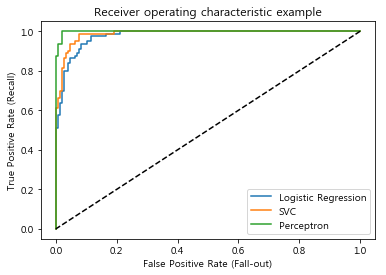

In [70]:
#roc커브 시각화
plt.title('Receiver operating characteristic example')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='SVC')
plt.plot(fpr3, tpr3, label='Perceptron')
plt.legend()

plt.plot([1,0],[1,0],'k--',label='random gu ess') ## 수정해야됨

# GridSearchCV

In [72]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### cv: MLP

In [73]:
#파이프라인 생성
pipe_mlp = Pipeline([("kbest", model_kbest),('mlp',mlp)])
#파라미터 생성
params_mlp = {"kbest__k":[144], #변수갯수 144개
          "mlp__hidden_layer_sizes": [(50,30),(20,40,20),(30,50),(10,20,20,10)]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_mlp, param_grid = params_mlp,
                          cv=3, n_jobs=-1, verbose=1)
#
grid_search.fit(sigungu_x_15scaled, sigungu.감염병)
mlp_grid = grid_search.best_estimator_ #최적의 모델! 이미 fit되어있음

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.7s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [74]:
#학습과 예측
mlp_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_mlp_grid = mlp_grid.predict(sigungu_x_14scaled)
score(mlp_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_mlp_grid)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


f1 :		0.8987341772151898
accuracy :	0.9292035398230089
precision :	0.9102564102564102
recall :	0.8875
[metric score]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklea

f1-score:(0.6988063914377173, array([0.7037037 , 0.71186441, 0.68085106]))
accuracy:(0.8053216374269007, array([0.80263158, 0.81333333, 0.8       ]))
precision:(0.7323146576117714, array([0.64516129, 0.70967742, 0.84210526]))
recall:(0.7217105732847862, array([0.86956522, 0.72413793, 0.57142857]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,0,1,All
True,,,
0,139,7,146
1,9,71,80
All,148,78,226


### cv: RFC

In [75]:
#파이프라인 생성
pipe_rfc = Pipeline([("kbest", model_kbest),('rfc',rfc)])
#파라미터 생성
params_rfc = {"kbest__k":[144],
          "rfc__max_depth": [10,15,20,25],
         "rfc__n_estimators": [10,200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_rfc, param_grid = params_rfc,
                          cv=3, n_jobs=-1, verbose=1)
grid_search.fit(sigungu_x_15scaled, sigungu.감염병)
#
rfc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
rfc_grid

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.5s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001A608840>)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [76]:
#학습과 예측
rfc_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_rfc_grid = rfc_grid.predict(sigungu_x_14scaled)

In [77]:
score(rfc_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_rfc_grid)

f1 :		0.9342105263157895
accuracy :	0.9557522123893806
precision :	0.9861111111111112
recall :	0.8875
[metric score]

 None
f1-score:(0.7347244953627933, array([0.75      , 0.73076923, 0.72340426]))
accuracy:(0.8050877192982456, array([0.85526316, 0.77333333, 0.78666667]))
precision:(0.8236079328756675, array([0.75      , 0.82608696, 0.89473684]))
recall:(0.6441600628257299, array([0.73913043, 0.5862069 , 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,145,1,146
1,9,71,80
All,154,72,226


### cv: xgb

In [79]:
#파이프라인 생성
pipe_xgb = Pipeline([("kbest", model_kbest),('xgb',xgb)])
#파라미터 생성
params_xgb = {"kbest__k":[144],
          "xgb__max_depth": [10,15,20,25],
         "xgb__learning_rate": [0.01,0.05],
         "xgb__n_estimators": [200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_xgb, param_grid = params_xgb,
                          cv=3, n_jobs=-1, verbose=0, scoring='recall')###############RECALL
grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
#
xgb_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [80]:
#학습과 예측
xgb_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_xgb_grid = xgb_grid.predict(sigungu_x_14scaled)
#스코어
score(xgb_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_xgb_grid)

f1 :		0.7424242424242424
accuracy :	0.8495575221238938
precision :	0.9423076923076923
recall :	0.6125
[metric score]

 None
f1-score:(0.707876370887338, array([0.74509804, 0.71186441, 0.66666667]))
accuracy:(0.8007602339181288, array([0.82894737, 0.77333333, 0.8       ]))
precision:(0.753641456582633, array([0.67857143, 0.7       , 0.88235294]))
recall:(0.6953130577568358, array([0.82608696, 0.72413793, 0.53571429]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,143,3,146
1,31,49,80
All,174,52,226


### cv: lgbm

In [81]:
#파이프라인 생성
pipe_lgbm = Pipeline([("kbest", model_kbest),('lgbm',lgbm)])
#파라미터 생성
params_lgbm = {"kbest__k":[144],
          "lgbm__max_depth": [5,10,15,20,25],
         "lgbm__learning_rate": [0.01,0.05],
         "lgbm__n_estimators": [200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_lgbm, param_grid = params_lgbm,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
#
lgbm_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
lgbm_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001A608840>)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.01, max_depth=5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=200, n_jobs=-1,
                                num_boost_round=500, num_leaves=31,
                                objective=None, random_state=None,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [82]:
#학습과 예측
lgbm_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_lgbm_grid = lgbm_grid.predict(sigungu_x_14scaled)
#스코어
score(lgbm_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_lgbm_grid)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


f1 :		0.6874999999999999
accuracy :	0.8230088495575221
precision :	0.9166666666666666
recall :	0.55
[metric score]

 None


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use 

f1-score:(0.7402550091074681, array([0.8       , 0.75409836, 0.66666667]))
accuracy:(0.8183625730994152, array([0.86842105, 0.8       , 0.78666667]))
precision:(0.7531635802469135, array([0.74074074, 0.71875   , 0.8       ]))
recall:(0.7446990790319127, array([0.86956522, 0.79310345, 0.57142857]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,142,4,146
1,36,44,80
All,178,48,226


### cv: lr

In [85]:
# #파이프라인 생성
# pipe_lr = Pipeline([("kbest", model_kbest),('lr',lr)])
# #파라미터 생성
# params_lr = {"kbest__k":[144],
#           "lr__tol": [10,15,20,25],
#          "lr__C": [0.01,0.05],}
# #최적모델 찾기
# grid_search = GridSearchCV(pipe_lr, param_grid = params_lr,
#                           cv=3, n_jobs=-1, verbose=0)
# grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
# #
# lr_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음

### cv: dtc

In [83]:
#파이프라인 생성
pipe_dtc = Pipeline([("kbest", model_kbest),('dtc',dtc)])
#파라미터 생성
params_dtc = {"kbest__k":[144],
          "dtc__max_depth": [10,15,20,25],
         "dtc__max_features": [50,80,100]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_dtc, param_grid = params_dtc,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
#
dtc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
dtc_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001A608840>)),
                ('dtc',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=10, max_features=100,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [84]:
#학습과 예측
dtc_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_dtc_grid = dtc_grid.predict(sigungu_x_14scaled)
#스코어
score(dtc_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_dtc_grid)

f1 :		0.7891156462585034
accuracy :	0.8628318584070797
precision :	0.8656716417910447
recall :	0.725
[metric score]

 None
f1-score:(0.644935481339477, array([0.71698113, 0.47272727, 0.74509804]))
accuracy:(0.7962573099415206, array([0.84210526, 0.72      , 0.82666667]))
precision:(0.6582828282828284, array([0.48484848, 0.64      , 0.85      ]))
recall:(0.6308988362961377, array([0.69565217, 0.48275862, 0.71428571]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,137,9,146
1,22,58,80
All,159,67,226


### cv: pcp

In [85]:
#파이프라인 생성
pipe_pcp = Pipeline([("kbest", model_kbest),('pcp',pcp)])
#파라미터 생성
params_pcp = {"kbest__k":[144],
          "pcp__alpha": [0.0001, 0.0003, 0.0005],
         "pcp__tol": [0.001,0.003, 0.005],
         "pcp__max_iter": [500,1000,1500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_pcp, param_grid = params_pcp,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
#
pcp_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
pcp_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001A608840>)),
                ('pcp',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_intercept=True,
                            max_iter=500, n_iter_no_change=5, n_jobs=None,
                            penalty=None, random_state=0, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False)

In [86]:
#학습과 예측
pcp_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_pcp_grid = pcp_grid.predict(sigungu_x_14scaled)
#스코어
score(pcp_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_pcp_grid)

f1 :		0.84472049689441
accuracy :	0.8893805309734514
precision :	0.8395061728395061
recall :	0.85
[metric score]

 None
f1-score:(0.6982323232323232, array([0.63636364, 0.75      , 0.70833333]))
accuracy:(0.8053801169590643, array([0.78947368, 0.81333333, 0.81333333]))
precision:(0.7648148148148147, array([0.66666667, 0.77777778, 0.85      ]))
recall:(0.6466588134504176, array([0.60869565, 0.72413793, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,133,13,146
1,12,68,80
All,145,81,226


### cv: svc

In [87]:
#파이프라인 생성
pipe_svc = Pipeline([("kbest", model_kbest),('svc',svc)])
#파라미터 생성
params_svc = {"kbest__k":[144],
          "svc__C": [1000,3000,5000],
         "svc__cache_size": [100,200,300],
         "svc__tol": [0.001,0.0005,0.0003],
             "svc__gamma":[0.0001,0.0003,0.0005]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_svc, param_grid = params_svc,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.감염병)
#
svc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
svc_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001A608840>)),
                ('svc',
                 SVC(C=1000, cache_size=100, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0003,
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [89]:
#학습과 예측
svc_grid.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_svc_grid = svc_grid.predict(sigungu_x_14scaled)
#스코어
score(svc_grid, sigungu_x_14scaled, sigungu_y.감염병, pred_svc_grid)

f1 :		0.8627450980392157
accuracy :	0.9070796460176991
precision :	0.9041095890410958
recall :	0.825
[metric score]

 None
f1-score:(0.7150528804280203, array([0.72      , 0.70175439, 0.72340426]))
accuracy:(0.8052631578947368, array([0.81578947, 0.77333333, 0.82666667]))
precision:(0.7585630743525481, array([0.66666667, 0.71428571, 0.89473684]))
recall:(0.6931355750696081, array([0.7826087 , 0.68965517, 0.60714286]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,139,7,146
1,14,66,80
All,153,73,226
